## Throughput functions

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import importlib
import data_preprocessing as pp
importlib.reload(pp)

<module 'data_preprocessing' from 'C:\\Users\\Anna\\Documents\\Master\\SS_23\\BDSPRO\\CEP2ASP_17_07\\plotting\\data_preprocessing.py'>

In [24]:
def plot_throughput_per_second(df, settings, plot_lim):
    system, pattern = settings["name"].split("_")
    plt.plot(df["index"], df["Elements/Second"]/1000, label=system)
    plt.xlabel("seconds")
    plt.ylabel("k elements")
    
    plt.ylim(0,plot_lim)
    plt.legend()
    plt.title("Throughput - "+pattern+" - selectivity "+ settings["selectivity"])

In [3]:
def plot_throughput_system_comparison(systems_dfs, rate):
    for system_df in systems_dfs:
        pattern = system_df["Pattern"][0]
        system = system_df["System"][0]
        plt.plot(system_df.index, system_df["Elements/Second"], label=system)
        plt.title("Throughput - "+pattern+" - ingestion rate: "+rate)
    plt.xlabel("seconds")
    plt.ylabel("k elements")
    plt.ylim(0,270)
    #plt.axhline(settings["throughput"]/1000, color='red', linestyle='dotted', label="data ingestion rate")
    plt.legend()

In [4]:
def plot_throughput_rate_comparison(rate_dfs, system):
    for rate_df in rate_dfs:
        pattern = rate_df["Pattern"][0]
        rate = rate_df["ingestion_rate"][0]
        plt.plot(rate_df.index, rate_df["Elements/Second"], label=rate)
        plt.title("Throughput - "+pattern+" - system: "+system)
    plt.xlabel("seconds")
    plt.ylabel("k elements")
    plt.ylim(0,210)
    #plt.axhline(settings["throughput"]/1000, color='red', linestyle='dotted', label="data ingestion rate")
    plt.legend()

## Latency functions

In [34]:
def plot_latency_per_second(df, settings, plot_lim):
    system, pattern = settings["name"].split("_")
    plt.plot(df["total_latency"]/df["patterns_cnt"], label=system)  
    plt.ylim(0,plot_lim)
    plt.title("Latency - "+pattern+" - selectivity "+ settings["selectivity"])
    plt.xlabel("seconds")
    plt.ylabel("Average latency (ms)")
    plt.legend()
    #plt.show()

In [28]:
def plot_latency_system_comparison(systems_dfs, rate):
    for system_df in systems_dfs:
        pattern = system_df["Pattern"][0]
        system = system_df["System"][0]
        plt.plot(system_df.index, system_df["Latency"], label=system)
        plt.title("Latency - "+pattern+" - ingestion rate: "+rate)
    plt.xlabel("seconds")
    plt.ylabel("Average latency (ms)")
    plt.ylim(0,300)
    #plt.axhline(settings["throughput"]/1000, color='red', linestyle='dotted', label="data ingestion rate")
    plt.legend()

In [29]:
def plot_latency_rate_comparison(rate_dfs, system):
    for rate_df in rate_dfs:
        pattern = rate_df["Pattern"][0]
        rate = rate_df["ingestion_rate"][0]
        plt.plot(rate_df.index, rate_df["Latency"], label=rate)
        plt.title("Latency - "+pattern+" - system: "+system)
    plt.xlabel("seconds")
    plt.ylabel("Average latency (ms)")
    plt.ylim(0,210)
    #plt.axhline(settings["throughput"]/1000, color='red', linestyle='dotted', label="data ingestion rate")
    plt.legend()

In [30]:
#old, scatter plot for latency for each pattern. only use for small datasets. after upscaling we only plot average latency per second
def plot_latency_per_pattern(df,settings): #old
    plt.scatter(df.index, df["event_det_lat"], label="event detection latency", s=3)
    plt.scatter(df.index, df["pattern_det_lat"], label="pattern detection latency", s=3)
    plt.scatter(df.index, df["total_latency"], label="total latency", s=3)
    print("detected patterns: ", len(df))
    plt.xlabel("patterns")
    plt.ylabel("Latency (ms)")
#     plt.ylim(0,700)
    plt.xticks(df.index)
    plt.title(settings["name"]+"\ndetection latency per pattern")
    suptitle = "\n".join([f"{key}: {value}" for key, value in settings.items() if key != "name"])
    plt.suptitle(suptitle, va='center', ha='left', x=1.02, y=0.5)
    plt.show()

# Plotting

# Varying selectivity (0.1%, 1%, 10%)

# Patterns: SEQ1-SP0, AND, OR, ITER2

Fixed data ingestion rate (500k tuples/second)

## Throughput per second
plots for each pattern and each selectivity: 0.1%, 1%, 10%, 10%\_skewed - Comparing systems

runtime CEP2ASP_SEQ1-SP0 : 39 s
runtime FlinkCEP_SEQ1-SP0 : 46 s


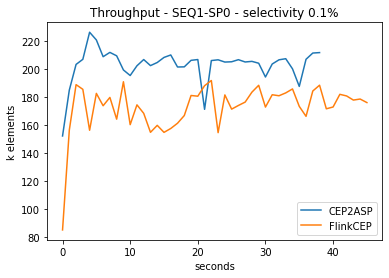

runtime CEP2ASP_SEQ1-SP0 : 40 s
runtime FlinkCEP_SEQ1-SP0 : 53 s


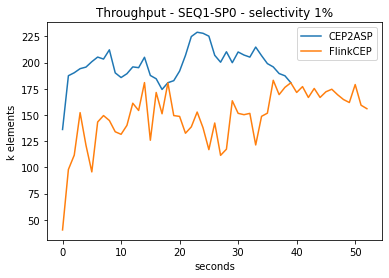

runtime CEP2ASP_SEQ1-SP0 : 43 s
runtime FlinkCEP_SEQ1-SP0 : 53 s


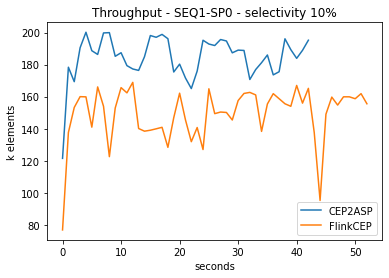

runtime FlinkCEP_SEQ1-SP0 : 46 s
runtime CEP2ASP_SEQ1-SP0 : 40 s


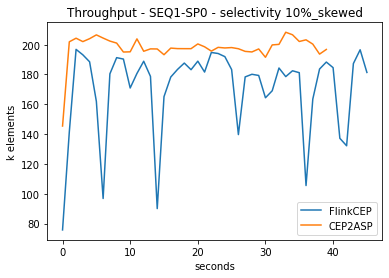

runtime CEP2ASP_AND : 53 s
runtime FlinkCEP_AND : 65 s


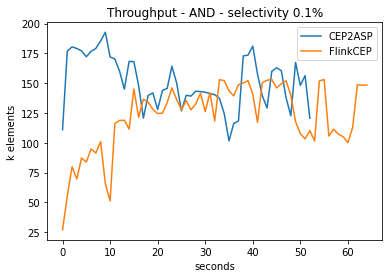

runtime CEP2ASP_AND : 58 s
runtime FlinkCEP_AND : 65 s


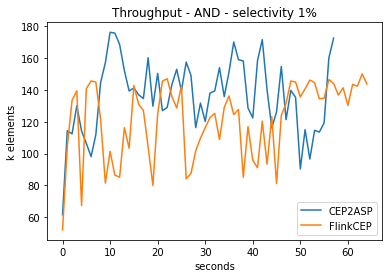

runtime CEP2ASP_AND : 46 s
runtime FlinkCEP_AND : 66 s


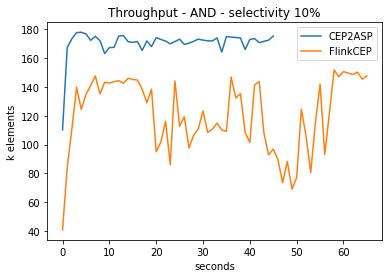

runtime CEP2ASP_AND : 51 s
runtime FlinkCEP_AND : 61 s


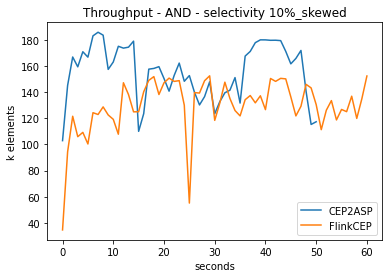

runtime CEP2ASP_OR : 37 s
runtime FlinkCEP_OR : 67 s


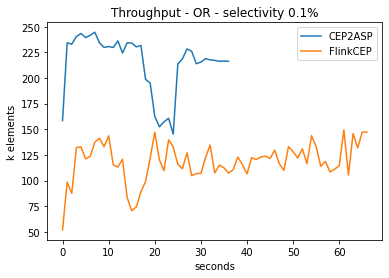

runtime CEP2ASP_OR : 41 s
runtime FlinkCEP_OR : 64 s


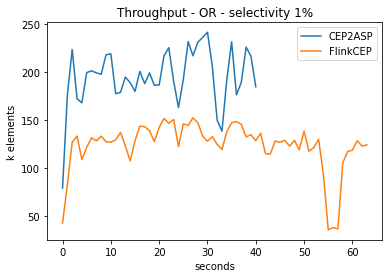

runtime CEP2ASP_OR : 38 s
runtime FlinkCEP_OR : 55 s


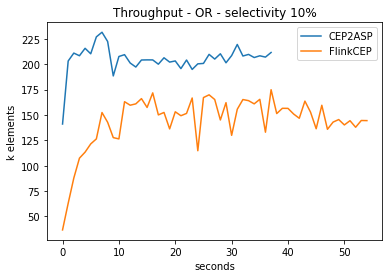

runtime CEP2ASP_OR : 37 s
runtime FlinkCEP_OR : 64 s


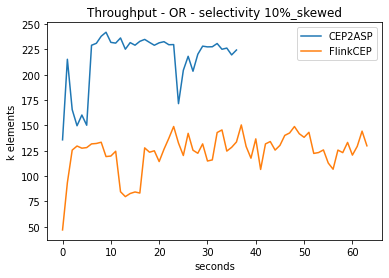

runtime CEP2ASP_ITER2 : 31 s
runtime FlinkCEP_ITER2 : 61 s


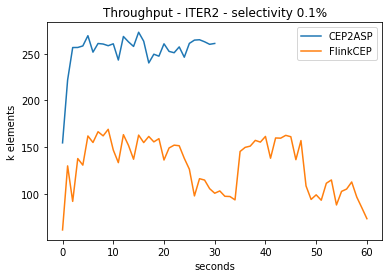

runtime FlinkCEP_ITER2 : 108 s
runtime CEP2ASP_ITER2 : 33 s


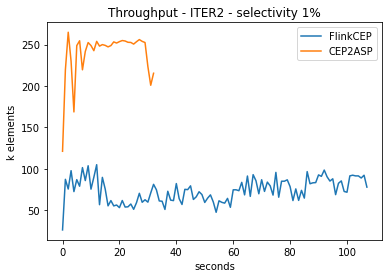

runtime CEP2ASP_ITER2 : 46 s
runtime FlinkCEP_ITER2 : 318 s


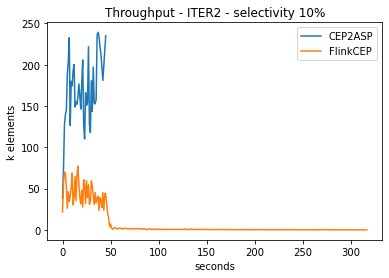

runtime CEP2ASP_ITER2 : 30 s
runtime FlinkCEP_ITER2 : 46 s


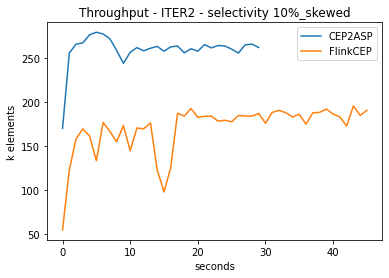

In [31]:
root = "logs/exp-2-sel"
save = "plots/exp-2-sel"
patterns=["seq", "and", "or", "iter2"]
sel_folders = ["0.1%", "1%","10%", "10%_skewed"]
plot_lim=280
for pattern in patterns:
    for sel_folder in sel_folders:
        file_path=root+"/"+pattern+"/"+sel_folder
        for file_name in os.listdir(file_path):
            if os.path.isfile(os.path.join(file_path, file_name)):
                file = file_path + "/" + file_name
                throughput_df = pp.get_throughput_df_from_log(file)
                settings = pp.get_settings_from_log(file)
                settings["selectivity"]=sel_folder
                plot_throughput_per_second(throughput_df, settings, plot_lim)
                print("runtime", settings["name"], ":", throughput_df.shape[0], "s")
                system, pattern_name = settings["name"].split("_")
        plt.savefig(save+"/sel_"+sel_folder+"_"+pattern_name+"_tput.jpg")
        plt.show()

## Throughput Boxplots
plots for each pattern - comparing systems and selectivities

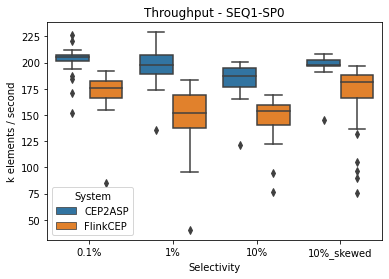

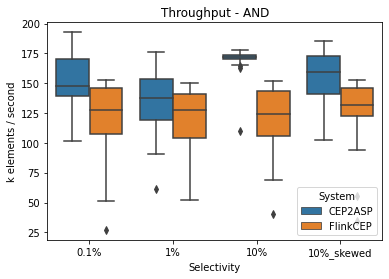

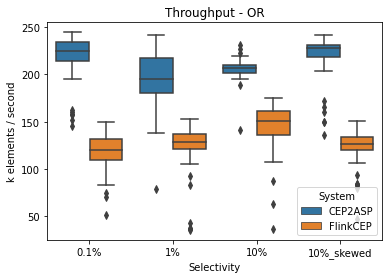

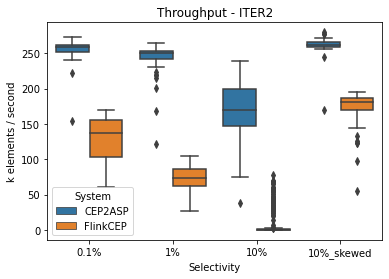

In [10]:
root = "logs/exp-2-sel"
save = "plots/exp-2-sel"
patterns=["seq", "and", "or", "iter2"]
sel_folders = ["0.1%", "1%","10%", "10%_skewed"]
for pattern in patterns:
    path = root + "/" + pattern
    seq_merged = pp.get_merged_df_per_pattern_sel(path, sel_folders)
    ax = sns.boxplot(data=seq_merged, x="Selectivity", y="Elements/Second", hue="System", orient="v")
    pattern_name = seq_merged["Pattern"][0]
    ax.set_title("Throughput - "+pattern_name)  # Add title to the box plot
    ax.set_ylabel("k elements / second")
    plt.savefig(save+"/sel_boxplot_"+pattern_name+"_tput.jpg")
    plt.show()

## Latency per second
plots for each pattern and each selectivity (0.1%, 1%, 10%) - comparing systems

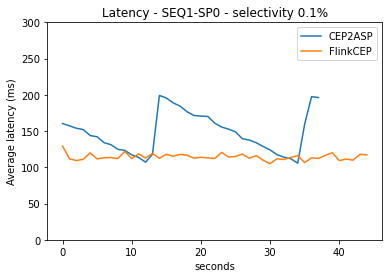

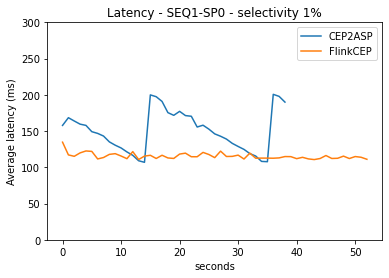

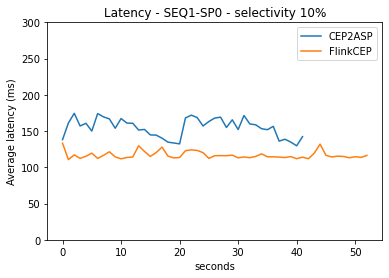

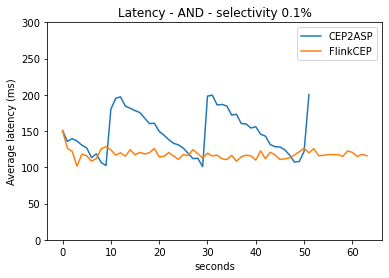

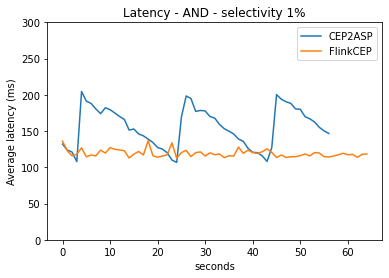

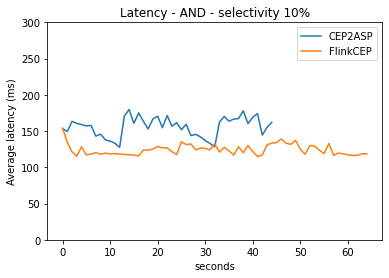

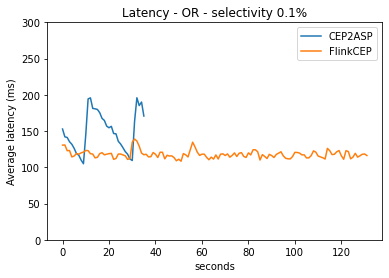

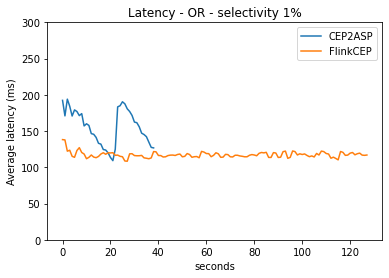

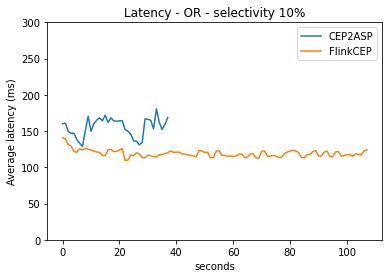

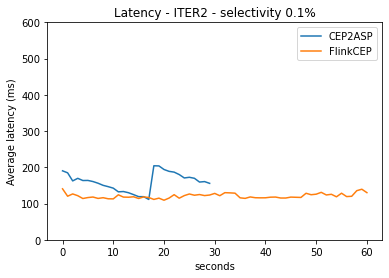

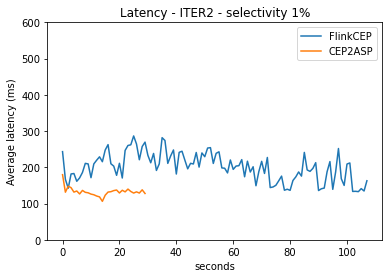

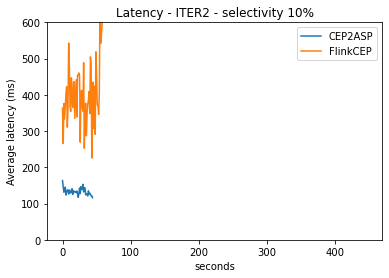

In [35]:
root = "logs/exp-2-sel"
save = "plots/exp-2-sel"
patterns=["seq", "and", "or", "iter2"]
sel_folders = ["0.1%", "1%","10%"]#, "10%_skewed"] skewed doesnt have latency
plot_lim=300
for pattern in patterns:
    if pattern=="iter2":
        plot_lim=600 #because it crashes and therefore lim is out of bounds for 300 (FlinkCEP)
    for sel_folder in sel_folders:
        file_path=root+"/"+pattern+"/"+sel_folder
        for file_name in os.listdir(file_path):
            if os.path.isfile(os.path.join(file_path, file_name)):
                file = file_path + "/" + file_name

                latency_df = pp.get_latency_df_from_log(file)
                settings = pp.get_settings_from_log(file)
                settings["selectivity"]=sel_folder
                plot_latency_per_second(latency_df, settings, plot_lim) 
                #print("runtime", settings["name"], ":", latency_df.shape[0], "s") #runtime shouldnt be extracted from latency logger here since there seams to be an issue
                system, pattern_name = settings["name"].split("_")
        plt.savefig(save+"/sel_"+sel_folder+"_"+pattern_name+"_lat.jpg")
        plt.show()

## Latency Boxplots 
plots for each pattern - comparing systems and selectivities

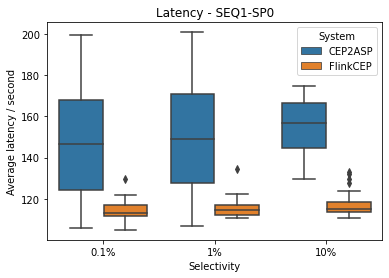

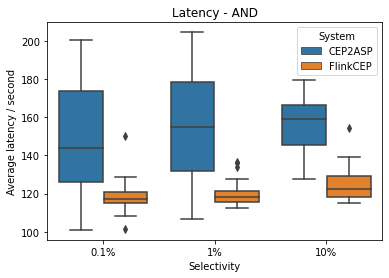

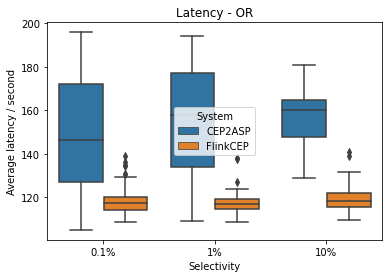

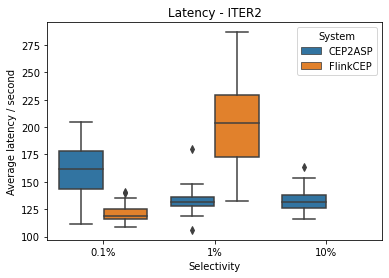

In [12]:
root = "logs/exp-2-sel"
save = "plots/exp-2-sel"
patterns=["seq", "and", "or", "iter2"]
sel_folders = ["0.1%", "1%", "10%"] # 10%_skewed didnt work here
for pattern in patterns:
    path = root + "/" + pattern
    seq_merged = pp.get_merged_df_per_pattern_sel(path, sel_folders)
    ax = sns.boxplot(data=seq_merged, x="Selectivity", y="Latency", hue="System", orient="v")
    pattern_name = seq_merged["Pattern"][0]
    ax.set_title("Latency - "+pattern_name)  # Add title to the box plot
    plt.ylabel("Average latency / second")
    plt.savefig(save+"/sel_boxplot_"+pattern_name+"_lat.jpg")
    plt.show()

# Varying data ingestion rate (200k, 1mln)

Fixed selectivity (10%)

## Throughput per second
### Patterns: AND, OR, ITER21, ITER2, SEQ1-SP0
plots for each pattern and each data ingestion rate - comparing systems

runtime FlinkCEP:  58 s
runtime CEP2ASP:  55 s


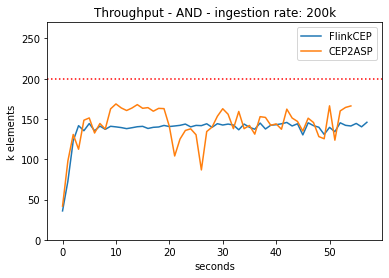

runtime FlinkCEP:  102 s
runtime CEP2ASP:  40 s


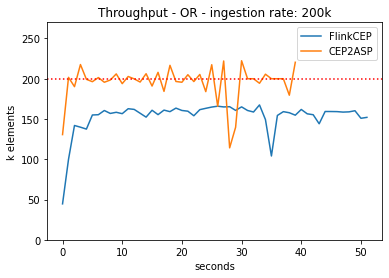

runtime FlinkCEP:  51 s
runtime CEP2ASP:  44 s


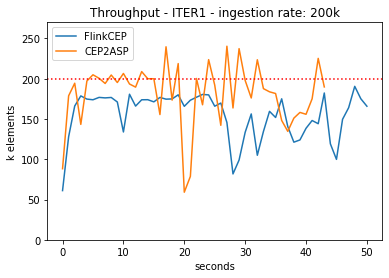

runtime FlinkCEP:  144 s
runtime CEP2ASP:  43 s


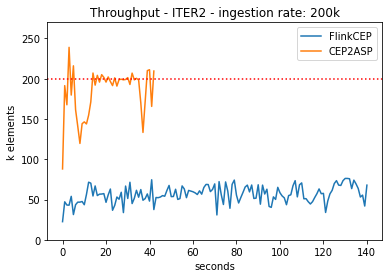

runtime FlinkCEP:  54 s
runtime CEP2ASP:  44 s


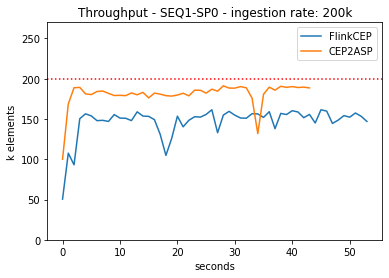

runtime FlinkCEP:  69 s
runtime CEP2ASP:  49 s


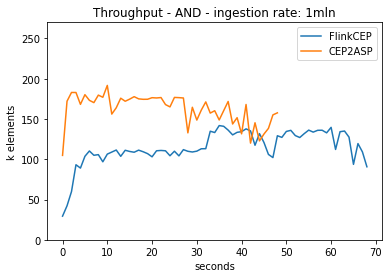

runtime FlinkCEP:  116 s
runtime CEP2ASP:  35 s


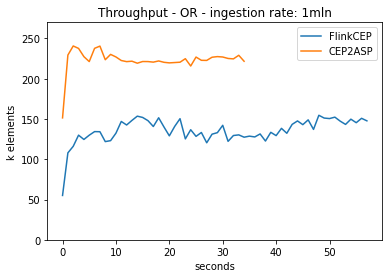

runtime FlinkCEP:  47 s
runtime CEP2ASP:  38 s


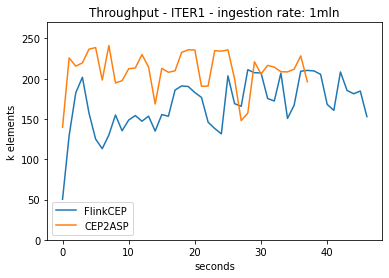

runtime FlinkCEP:  129 s
runtime CEP2ASP:  33 s


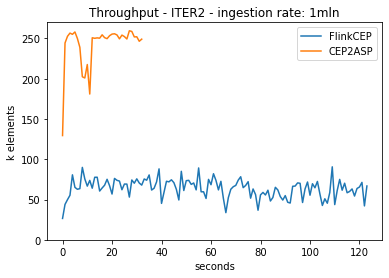

runtime FlinkCEP:  45 s
runtime CEP2ASP:  43 s


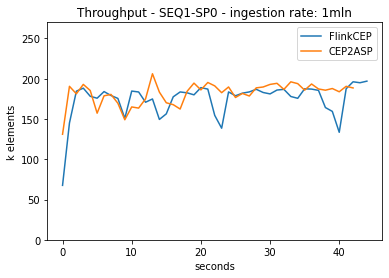

In [13]:
root = "logs/exp-1-rates"
save = "plots/exp-1-rates"
rates=["200k", "1mln"]
patterns = ["AND", "OR", "ITER1", "ITER2", "SEQ1-SP0"]
for rate in rates:
    all_merged = pp.get_merged_df_all(root, [rate])
    file_path=root+"/"+rate
    for pattern in patterns:
        pattern_df = all_merged[all_merged["Pattern"]==pattern]
        flink_df = pattern_df[pattern_df["System"]=="FlinkCEP"].reset_index(drop=True)
        cep2asp_df = pattern_df[pattern_df["System"]=="CEP2ASP"].reset_index(drop=True)
        print("runtime FlinkCEP: ", flink_df.shape[0], "s")
        print("runtime CEP2ASP: ", cep2asp_df.shape[0], "s")
        plot_throughput_system_comparison([flink_df, cep2asp_df], rate)
        if rate=="200k":
            plt.axhline(200, color='red', linestyle='dotted', label="data ingestion rate")
        
        plt.savefig(save+"/rate_"+rate+"_"+pattern_name+"_tput.jpg")
        plt.show()

## Throughput per second
### Patterns: SEQ1-SP0,  SEQ1-SP1, SEQ1-SP2, SEQ2-SP0, SEQ2-SP1, SEQ2-SP2
plots for each pattern, but here only system FlinkCEP - comparing data ingestion rate

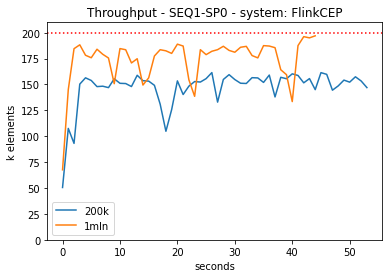

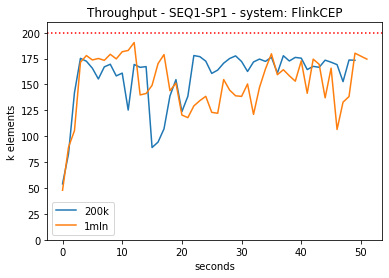

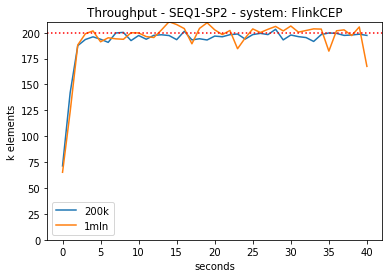

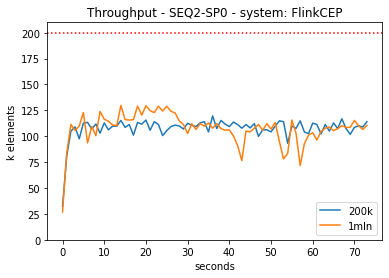

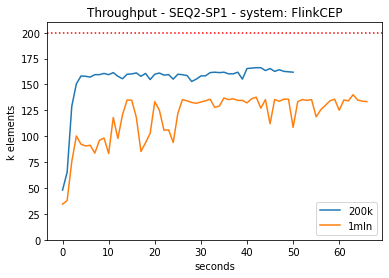

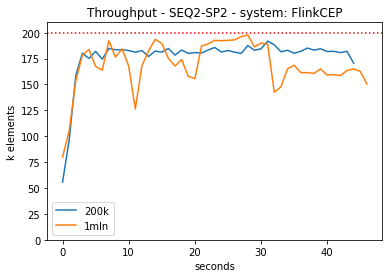

In [14]:
root = "logs/exp-1-rates"
save = "plots/exp-1-rates"
rates=["200k", "1mln"]
patterns = ["SEQ1-SP0", "SEQ1-SP1", "SEQ1-SP2", "SEQ2-SP0", "SEQ2-SP1", "SEQ2-SP2"]
all_merged = pp.get_merged_df_all(root, rates)
file_path=root+"/"+rate
for pattern in patterns:
    pattern_df = all_merged[all_merged["Pattern"]==pattern]
    system = "FlinkCEP"
    flink_df = pattern_df[pattern_df["System"]==system].reset_index(drop=True) #these patterns are only FlinkCEP
    rate_200k = flink_df[flink_df["ingestion_rate"]=="200k"].reset_index(drop=True)
    rate_1mln = flink_df[flink_df["ingestion_rate"]=="1mln"].reset_index(drop=True)
    plot_throughput_rate_comparison([rate_200k, rate_1mln], system)
    plt.axhline(200, color='red', linestyle='dotted', label="data ingestion rate")
    plt.savefig(save+"/rates_comp_FlinkCEP_"+pattern_name+"_tput.jpg")
    plt.show()

## Throughput Boxplots
summary of the above:
1) for both ingestion rates - comparing FlinkCEP and CEP2ASP for patterns AND, OR, ITER1, ITER2, SEQ1-SP0

2) for each pattern - comparing systems and ingestion rates

3) comparing ingestion rates and selection policies for sequence patterns (only FlinkCEP) 

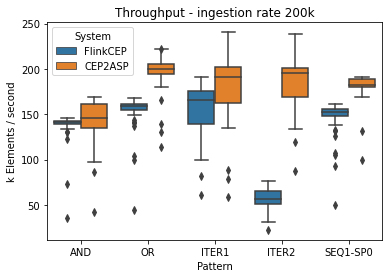

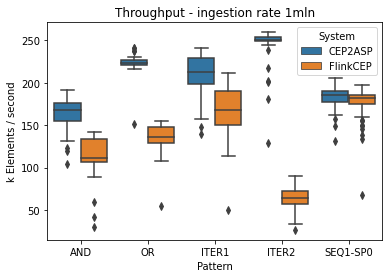

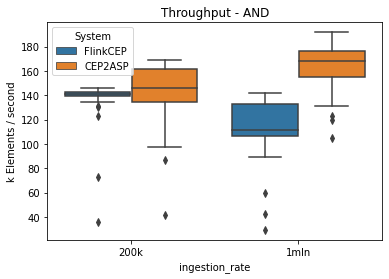

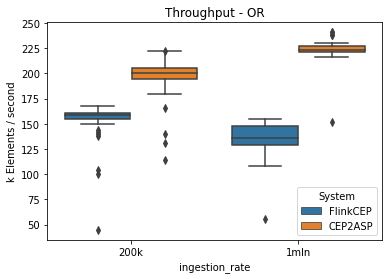

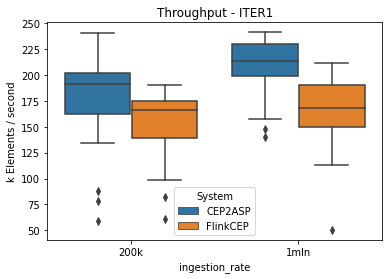

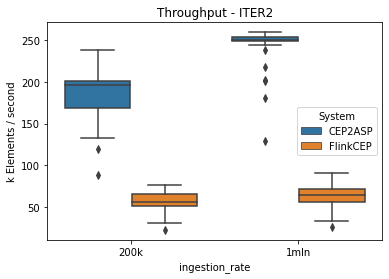

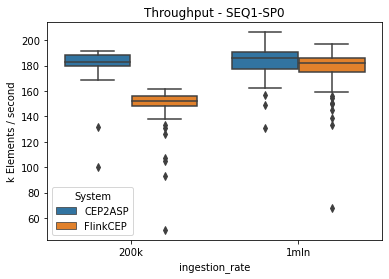

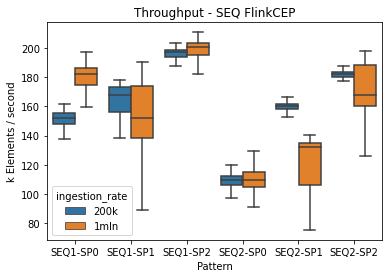

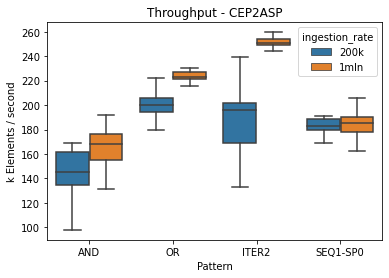

In [43]:
root = "logs/exp-1-rates"
save = "plots/exp-1-rates"
rates=["200k", "1mln"]

all_merged = pp.get_merged_df_all(root, rates)
patterns = ["AND", "OR", "ITER1", "ITER2", "SEQ1-SP0"]
pattern_df = all_merged[all_merged["Pattern"].isin(patterns)]
rate_df = pattern_df[pattern_df["ingestion_rate"]=="200k"]
ax = sns.boxplot(data=rate_df, x="Pattern", y="Elements/Second", hue="System", orient="v", order=patterns)
ax.set_title("Throughput - ingestion rate 200k")  # Add title to the box plot
ax.set_ylabel("k Elements / second")
plt.savefig(save+"/rate_200k_boxplot_tput.jpg")
plt.show()

patterns = ["AND", "OR", "ITER1", "ITER2", "SEQ1-SP0"]
pattern_df = all_merged[all_merged["Pattern"].isin(patterns)]
rate_df = pattern_df[pattern_df["ingestion_rate"]=="1mln"]
ax = sns.boxplot(data=rate_df, x="Pattern", y="Elements/Second", hue="System", orient="v", order=patterns)
ax.set_title("Throughput - ingestion rate 1mln")  # Add title to the box plot
ax.set_ylabel("k Elements / second")
plt.savefig(save+"/rate_1mln_boxplot_tput.jpg")
plt.show()

for pattern in patterns:
    pattern_df = all_merged[all_merged["Pattern"]==pattern]
    ax = sns.boxplot(data=pattern_df, x="ingestion_rate", y="Elements/Second", hue="System", orient="v")
    ax.set_title("Throughput - "+pattern)  # Add title to the box plot
    ax.set_ylabel("k Elements / second")
    plt.savefig(save+"/rates_comp_"+pattern+"_tput.jpg")
    plt.show()

patterns = ["SEQ1-SP0", "SEQ1-SP1", "SEQ1-SP2", "SEQ2-SP0", "SEQ2-SP1", "SEQ2-SP2"]
pattern_df = all_merged[all_merged["Pattern"].isin(patterns)]
pattern_df = pattern_df[pattern_df["System"].isin(["FlinkCEP"])]
ax = sns.boxplot(data=pattern_df, x="Pattern", y="Elements/Second", hue="ingestion_rate", order=patterns, orient="v", showfliers=False)
ax.set_title("Throughput - SEQ FlinkCEP")  # Add title to the box plot
ax.set_ylabel("k Elements / second")
#plt.xticks(rotation=45)
plt.savefig(save+"/rates_comp_FlinkCEP_tput.jpg")
plt.show()


#these patterns only are implemented for FlinkCEP.. so hue shows both ingestion rates instead of systems
patterns = ["AND", "OR", "ITER2", "SEQ1-SP0"]
pattern_df = all_merged[all_merged["Pattern"].isin(patterns)]
#pattern_df = pattern_df[pattern_df["ingestion_rate"]=="1mln"]
pattern_df = pattern_df[pattern_df["System"].isin(["CEP2ASP"])]
ax = sns.boxplot(data=pattern_df, x="Pattern", y="Elements/Second", hue="ingestion_rate", order=patterns, orient="v", showfliers=False)
ax.set_title("Throughput - CEP2ASP")  # Add title to the box plot
#plt.xticks(rotation=45)
ax.set_ylabel("k Elements / second")
plt.savefig(save+"/rates_comp_CEP2ASP_tput.jpg")
plt.show()

## Latency per second
### Patterns: AND, OR, ITER21, ITER2, SEQ1-SP0
plots for each pattern and each data ingestion rate - comparing systems

runtime FlinkCEP:  58 s
runtime CEP2ASP:  55 s


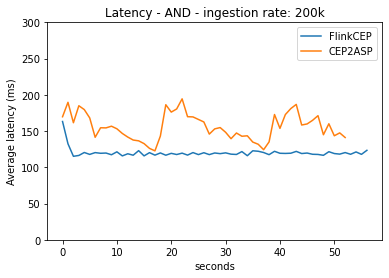

runtime FlinkCEP:  102 s
runtime CEP2ASP:  40 s


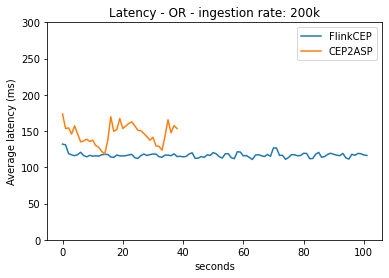

runtime FlinkCEP:  51 s
runtime CEP2ASP:  44 s


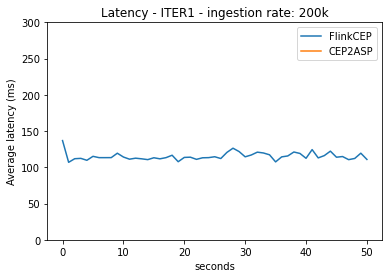

runtime FlinkCEP:  144 s
runtime CEP2ASP:  43 s


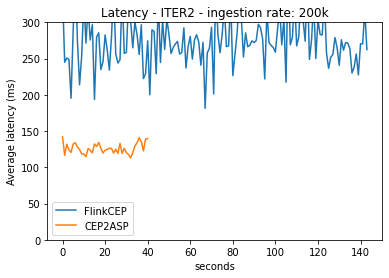

runtime FlinkCEP:  54 s
runtime CEP2ASP:  44 s


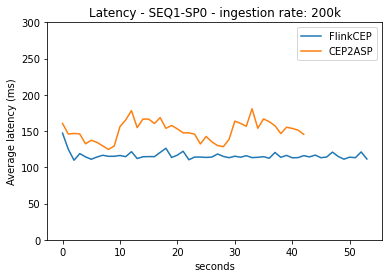

runtime FlinkCEP:  69 s
runtime CEP2ASP:  49 s


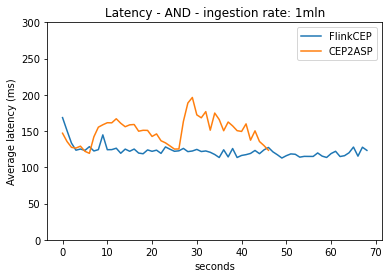

runtime FlinkCEP:  116 s
runtime CEP2ASP:  35 s


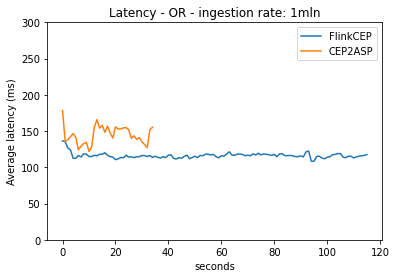

runtime FlinkCEP:  47 s
runtime CEP2ASP:  38 s


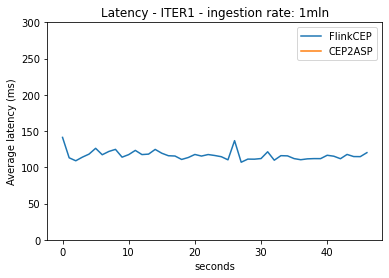

runtime FlinkCEP:  129 s
runtime CEP2ASP:  33 s


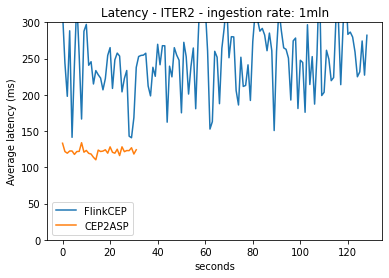

runtime FlinkCEP:  45 s
runtime CEP2ASP:  43 s


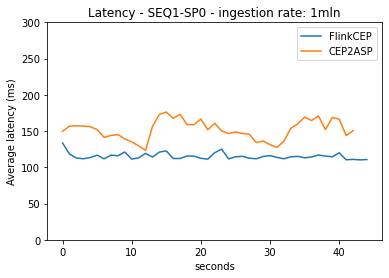

In [36]:
root = "logs/exp-1-rates"
save = "plots/exp-1-rates"
rates=["200k", "1mln"]
patterns = ["AND", "OR", "ITER1", "ITER2", "SEQ1-SP0"]
for rate in rates:
    all_merged = pp.get_merged_df_all(root, [rate])
    file_path=root+"/"+rate
    for pattern in patterns:
        pattern_df = all_merged[all_merged["Pattern"]==pattern]
        flink_df = pattern_df[pattern_df["System"]=="FlinkCEP"].reset_index(drop=True)
        cep2asp_df = pattern_df[pattern_df["System"]=="CEP2ASP"].reset_index(drop=True)
        print("runtime FlinkCEP: ", flink_df.shape[0], "s")
        print("runtime CEP2ASP: ", cep2asp_df.shape[0], "s")
        plot_latency_system_comparison([flink_df, cep2asp_df], rate)
        plt.savefig(save+"/rate_"+rate+"_"+pattern_name+"_lat.jpg")
        plt.show()

## Latency per second
### Patterns: SEQ1-SP0,  SEQ1-SP1, SEQ1-SP2, SEQ2-SP0, SEQ2-SP1, SEQ2-SP2
plots for each pattern, but here only system FlinkCEP - comparing data ingestion rate

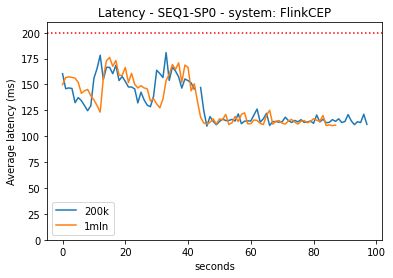

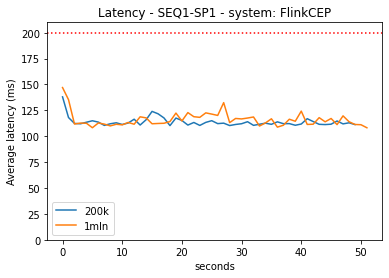

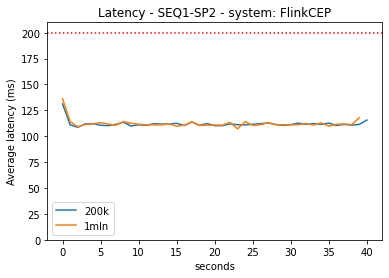

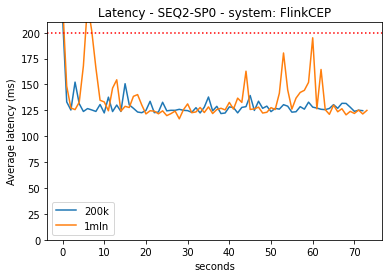

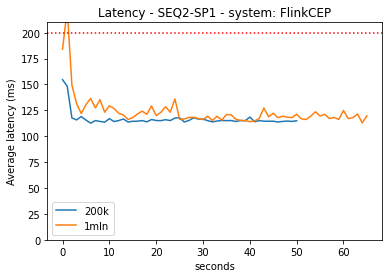

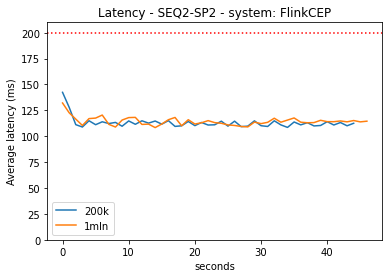

In [17]:
root = "logs/exp-1-rates"
save = "plots/exp-1-rates"
rates=["200k", "1mln"]
patterns = ["SEQ1-SP0", "SEQ1-SP1", "SEQ1-SP2", "SEQ2-SP0", "SEQ2-SP1", "SEQ2-SP2"]
all_merged = pp.get_merged_df_all(root, rates)
file_path=root+"/"+rate
for pattern in patterns:
    pattern_df = all_merged[all_merged["Pattern"]==pattern]
    system = "FlinkCEP"
    flink_df = pattern_df[pattern_df["System"]==system].reset_index(drop=True) #these patterns are only FlinkCEP
    rate_200k = pattern_df[pattern_df["ingestion_rate"]=="200k"].reset_index(drop=True)
    rate_1mln = pattern_df[pattern_df["ingestion_rate"]=="1mln"].reset_index(drop=True)
    plot_latency_rate_comparison([rate_200k, rate_1mln], system)
    plt.axhline(200, color='red', linestyle='dotted', label="data ingestion rate")
    plt.savefig(save+"/rates_comp_FlinkCEP_"+pattern_name+"_lat.jpg")
    plt.show()

## Latency Boxplots
summary of the above:
1) for both ingestion rates - comparing FlinkCEP and CEP2ASP for patterns AND, OR, ITER1, ITER2, SEQ1-SP0

2) for each pattern - comparing systems and ingestion rates

3) comparing ingestion rates and selection policies for sequence patterns (only FlinkCEP) 

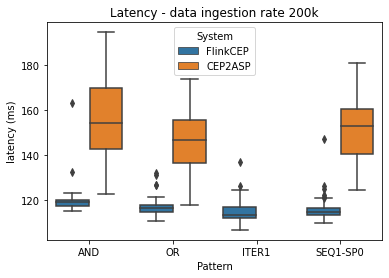

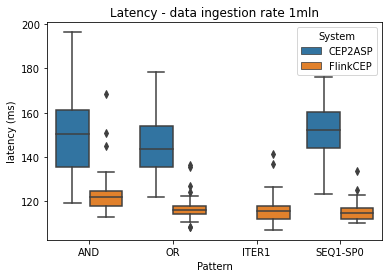

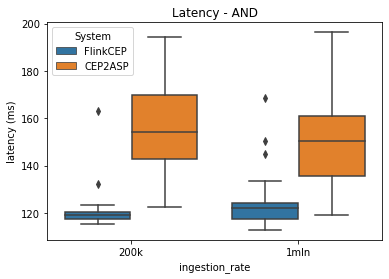

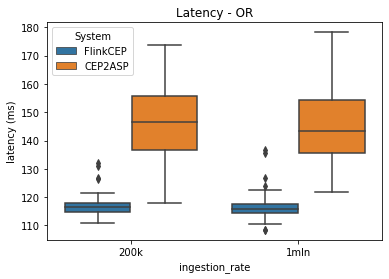

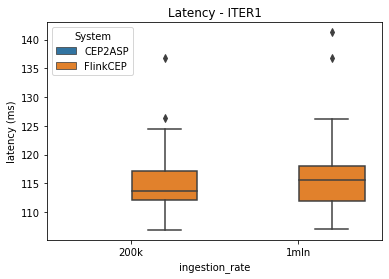

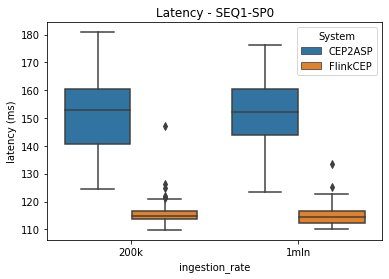

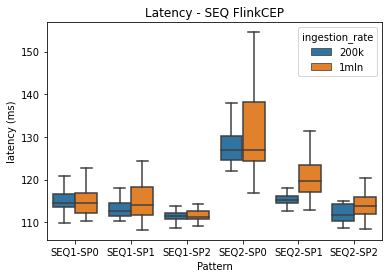

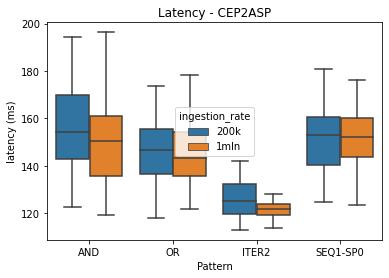

In [39]:
root = "logs/exp-1-rates"
save = "plots/exp-1-rates"
rates=["200k", "1mln"]
all_merged = pp.get_merged_df_all(root, rates).reset_index(drop=True)

patterns = ["AND", "OR", "ITER1", "SEQ1-SP0"] # "ITER2" removed because unproportionally out of bounds
pattern_df = all_merged[all_merged["Pattern"].isin(patterns)]
pattern_df = pattern_df[pattern_df["ingestion_rate"]=="200k"]
ax = sns.boxplot(data=pattern_df, x="Pattern", y="Latency", hue="System", orient="v", order=patterns)
ax.set_title("Latency - data ingestion rate 200k")  # Add title to the box plot
ax.set_ylabel("latency (ms)")
plt.savefig(save+"/rate_200k_boxplot_lat.jpg")
plt.show()

patterns = ["AND", "OR", "ITER1", "SEQ1-SP0"] # "ITER2" removed because unproportionally out of bounds
pattern_df = all_merged[all_merged["Pattern"].isin(patterns)]
pattern_df = pattern_df[pattern_df["ingestion_rate"]=="1mln"]
ax = sns.boxplot(data=pattern_df, x="Pattern", y="Latency", hue="System", orient="v", order=patterns)
ax.set_title("Latency - data ingestion rate 1mln")  # Add title to the box plot
ax.set_ylabel("latency (ms)")
plt.savefig(save+"/rate_1mln_boxplot_lat.jpg")
plt.show()

for pattern in patterns:
    pattern_df = all_merged[all_merged["Pattern"]==pattern]
    ax = sns.boxplot(data=pattern_df, x="ingestion_rate", y="Latency", hue="System", orient="v")
    ax.set_title("Latency - "+pattern)  # Add title to the box plot
    ax.set_ylabel("latency (ms)")    
    plt.savefig(save+"/rates_comp_"+pattern+"_lat.jpg")
    plt.show()

#these patterns only are implemented for FlinkCEP.. so hue shows both ingestion rates instead of systems
patterns = ["SEQ1-SP0", "SEQ1-SP1", "SEQ1-SP2", "SEQ2-SP0", "SEQ2-SP1", "SEQ2-SP2"]
pattern_df = all_merged[all_merged["Pattern"].isin(patterns)]
#pattern_df = pattern_df[pattern_df["ingestion_rate"]=="1mln"]
pattern_df = pattern_df[pattern_df["System"].isin(["FlinkCEP"])]
ax = sns.boxplot(data=pattern_df, x="Pattern", y="Latency", hue="ingestion_rate", order=patterns, orient="v", showfliers=False)
ax.set_title("Latency - SEQ FlinkCEP")  # Add title to the box plot
#plt.xticks(rotation=45)
ax.set_ylabel("latency (ms)")
plt.savefig(save+"/rates_comp_FlinkCEP_lat.jpg")
plt.show()

#these patterns only are implemented for FlinkCEP.. so hue shows both ingestion rates instead of systems
patterns = ["AND", "OR", "ITER2", "SEQ1-SP0"]
pattern_df = all_merged[all_merged["Pattern"].isin(patterns)]
#pattern_df = pattern_df[pattern_df["ingestion_rate"]=="1mln"]
pattern_df = pattern_df[pattern_df["System"].isin(["CEP2ASP"])]
ax = sns.boxplot(data=pattern_df, x="Pattern", y="Latency", hue="ingestion_rate", order=patterns, orient="v", showfliers=False)
ax.set_title("Latency - CEP2ASP")  # Add title to the box plot
#plt.xticks(rotation=45)
ax.set_ylabel("latency (ms)")
plt.savefig(save+"/rates_comp_CEP2ASP_lat.jpg")
plt.show()

## Combining analogous latency and throughput plots from above

runtime FlinkCEP:  58 s
runtime CEP2ASP:  55 s


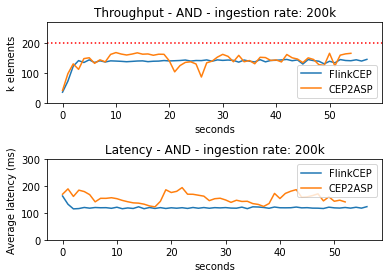

runtime FlinkCEP:  102 s
runtime CEP2ASP:  40 s


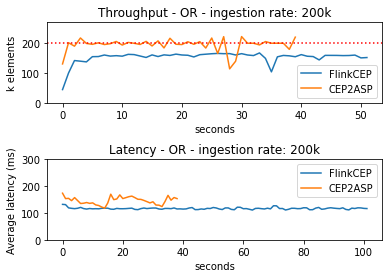

runtime FlinkCEP:  51 s
runtime CEP2ASP:  44 s


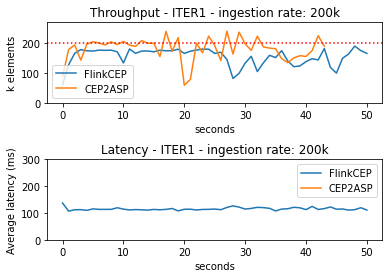

runtime FlinkCEP:  144 s
runtime CEP2ASP:  43 s


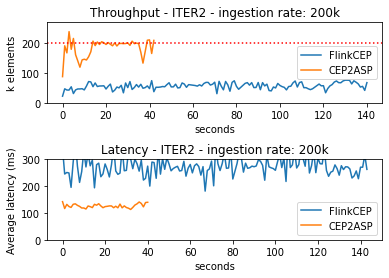

runtime FlinkCEP:  54 s
runtime CEP2ASP:  44 s


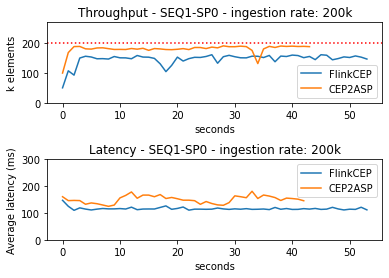

runtime FlinkCEP:  69 s
runtime CEP2ASP:  49 s


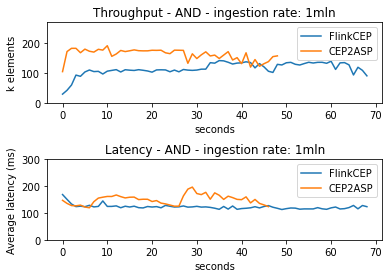

runtime FlinkCEP:  116 s
runtime CEP2ASP:  35 s


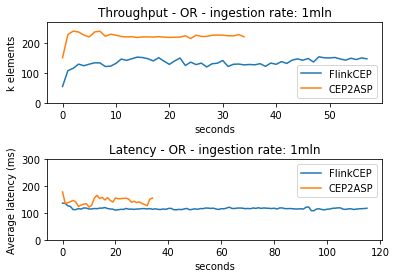

runtime FlinkCEP:  47 s
runtime CEP2ASP:  38 s


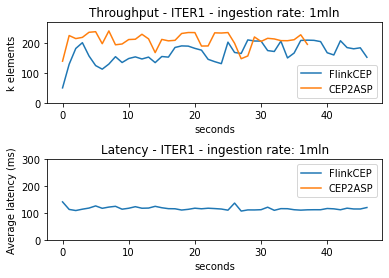

runtime FlinkCEP:  129 s
runtime CEP2ASP:  33 s


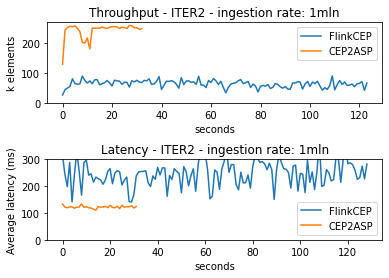

runtime FlinkCEP:  45 s
runtime CEP2ASP:  43 s


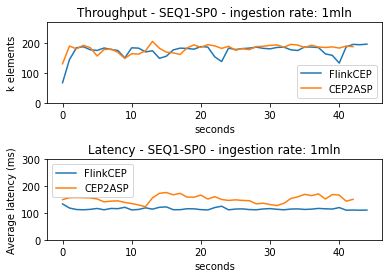

In [19]:
root = "logs/exp-1-rates"
save = "plots/exp-1-rates"
rates=["200k", "1mln"]
patterns = ["AND", "OR", "ITER1", "ITER2", "SEQ1-SP0"]
for rate in rates:
    all_merged = pp.get_merged_df_all(root, [rate])
    file_path=root+"/"+rate
    for pattern in patterns:
        pattern_df = all_merged[all_merged["Pattern"]==pattern]
        flink_df = pattern_df[pattern_df["System"]=="FlinkCEP"].reset_index(drop=True)
        cep2asp_df = pattern_df[pattern_df["System"]=="CEP2ASP"].reset_index(drop=True)
        print("runtime FlinkCEP: ", flink_df.shape[0], "s")
        print("runtime CEP2ASP: ", cep2asp_df.shape[0], "s")
        plt.subplot(2, 1, 1)
        plot_throughput_system_comparison([flink_df, cep2asp_df], rate)
        if rate=="200k":
            plt.axhline(200, color='red', linestyle='dotted', label="data ingestion rate")
        plt.subplot(2, 1, 2)
        plot_latency_system_comparison([flink_df, cep2asp_df], rate)
        plt.subplots_adjust(hspace=0.7)
        
        plt.savefig(save+"/tput_vs_lat_"+pattern+"_rate_"+rate+".jpg")
        plt.show()

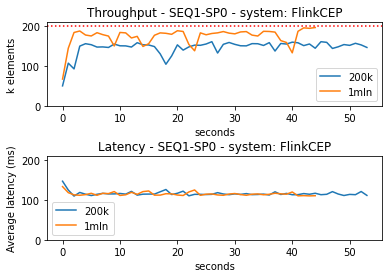

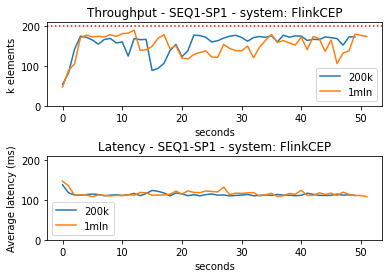

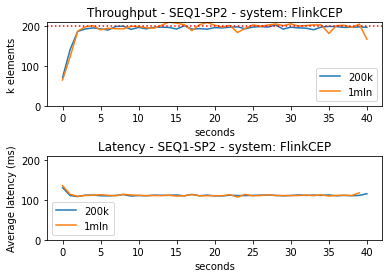

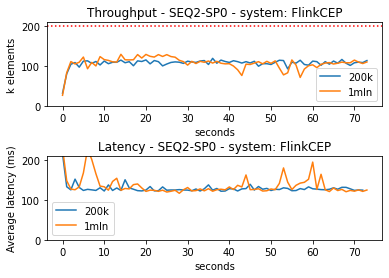

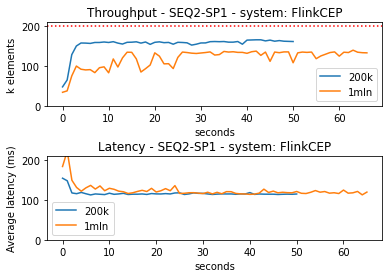

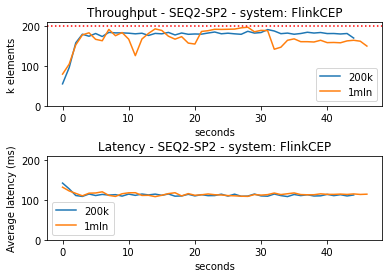

In [20]:
root = "logs/exp-1-rates"
save = "plots/exp-1-rates"
rates=["200k", "1mln"]
patterns = ["SEQ1-SP0", "SEQ1-SP1", "SEQ1-SP2", "SEQ2-SP0", "SEQ2-SP1", "SEQ2-SP2"]
all_merged = pp.get_merged_df_all(root, rates)
file_path=root+"/"+rate
for pattern in patterns:
    pattern_df = all_merged[all_merged["Pattern"]==pattern]
    system = "FlinkCEP"
    flink_df = pattern_df[pattern_df["System"]==system].reset_index(drop=True) #these patterns are only FlinkCEP
    rate_200k = flink_df[flink_df["ingestion_rate"]=="200k"].reset_index(drop=True)
    rate_1mln = flink_df[flink_df["ingestion_rate"]=="1mln"].reset_index(drop=True)
    
    plt.subplot(2, 1, 1)
    plot_throughput_rate_comparison([rate_200k, rate_1mln], system)
    plt.axhline(200, color='red', linestyle='dotted', label="data ingestion rate")
    plt.subplot(2, 1, 2)
    plot_latency_rate_comparison([rate_200k, rate_1mln], system)
    plt.subplots_adjust(hspace=0.6)
    plt.savefig(save+"/tput_vs_lat_"+pattern+"_rate_comp_FlinkCEP.jpg")
    plt.show()